In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import seaborn as sns 

In [2]:
Delivery_data = pd.read_csv('delivery_time.csv')
Delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


array([[<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>]], dtype=object)

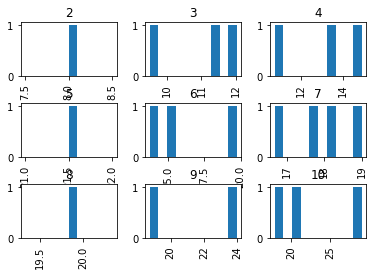

In [3]:
Delivery_data.hist(column= 'Delivery Time' , by= 'Sorting Time')

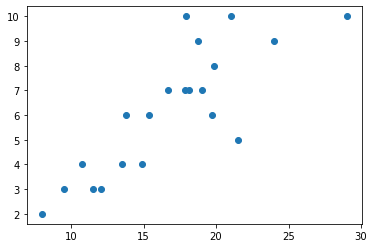

In [4]:
plt.scatter(x = 'Delivery Time' , y= 'Sorting Time', data= Delivery_data)

In [5]:
Delivery_data.corr(method= 'pearson')

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


###  Model Building 

In [6]:
y = Delivery_data['Delivery Time']
X = Delivery_data['Sorting Time']

In [7]:
Model = LinearRegression() 
Model.fit(Delivery_data,  Delivery_data['Delivery Time'])

LinearRegression()

In [8]:
cofficent = Model.coef_[0]
cofficent

0.9999999999999998

In [9]:
intercept= Model.intercept_
intercept

3.552713678800501e-15

In [10]:
Sorting_time_range = np.linspace(Delivery_data.min(), Delivery_data.max(), num=300)
Sorting_time_range

array([[ 8.        ,  2.        ],
       [ 8.07023411,  2.02675585],
       [ 8.14046823,  2.05351171],
       [ 8.21070234,  2.08026756],
       [ 8.28093645,  2.10702341],
       [ 8.35117057,  2.13377926],
       [ 8.42140468,  2.16053512],
       [ 8.4916388 ,  2.18729097],
       [ 8.56187291,  2.21404682],
       [ 8.63210702,  2.24080268],
       [ 8.70234114,  2.26755853],
       [ 8.77257525,  2.29431438],
       [ 8.84280936,  2.32107023],
       [ 8.91304348,  2.34782609],
       [ 8.98327759,  2.37458194],
       [ 9.05351171,  2.40133779],
       [ 9.12374582,  2.42809365],
       [ 9.19397993,  2.4548495 ],
       [ 9.26421405,  2.48160535],
       [ 9.33444816,  2.5083612 ],
       [ 9.40468227,  2.53511706],
       [ 9.47491639,  2.56187291],
       [ 9.5451505 ,  2.58862876],
       [ 9.61538462,  2.61538462],
       [ 9.68561873,  2.64214047],
       [ 9.75585284,  2.66889632],
       [ 9.82608696,  2.69565217],
       [ 9.89632107,  2.72240803],
       [ 9.96655518,

In [11]:
Delivery_Time_Pred = (21 * Sorting_time_range + intercept)
Delivery_Time_Pred

array([[168.        ,  42.        ],
       [169.47491639,  42.56187291],
       [170.94983278,  43.12374582],
       [172.42474916,  43.68561873],
       [173.89966555,  44.24749164],
       [175.37458194,  44.80936455],
       [176.84949833,  45.37123746],
       [178.32441472,  45.93311037],
       [179.7993311 ,  46.49498328],
       [181.27424749,  47.05685619],
       [182.74916388,  47.6187291 ],
       [184.22408027,  48.18060201],
       [185.69899666,  48.74247492],
       [187.17391304,  49.30434783],
       [188.64882943,  49.86622074],
       [190.12374582,  50.42809365],
       [191.59866221,  50.98996656],
       [193.0735786 ,  51.55183946],
       [194.54849498,  52.11371237],
       [196.02341137,  52.67558528],
       [197.49832776,  53.23745819],
       [198.97324415,  53.7993311 ],
       [200.44816054,  54.36120401],
       [201.92307692,  54.92307692],
       [203.39799331,  55.48494983],
       [204.8729097 ,  56.04682274],
       [206.34782609,  56.60869565],
 

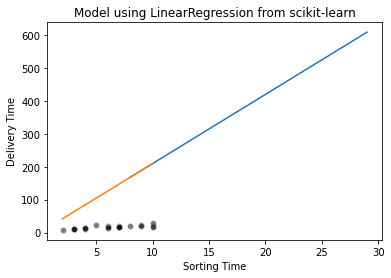

In [12]:
sns.scatterplot(x=Delivery_data['Sorting Time'], y= Delivery_data['Delivery Time'], color="black", alpha=0.5)
plt.plot(Sorting_time_range,Delivery_Time_Pred )
_ = plt.title("Model using LinearRegression from scikit-learn")

In [13]:
from sklearn.metrics import mean_squared_error

Delivery_Time_Prediction = Model.predict(Delivery_data)
model_error = mean_squared_error(Delivery_data['Delivery Time'],Delivery_Time_Prediction)
model_error

1.8031106405051697e-30

In [14]:
from sklearn.metrics import mean_absolute_error

model_error_ab = mean_absolute_error(Delivery_data['Delivery Time'], Delivery_Time_Prediction)
model_error_ab

6.767073673905716e-16

###  The Prediction of the Delivery Time with Sorting Time says with absolute error that it may differs with +_ 0.00000000000000006767  Days. 
### Hopefully the model is highly linear with the predicted Data.